In [1]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


tqdm.pandas()

In [2]:
train = pd.read_csv("../../dataset/processed/cleanDataset.csv", index_col=0)
test = pd.read_csv("../../dataset/processed/cleanTest.csv", index_col=0)

train.head()

,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,position,...,type_of_reinforcement_concrete,residential_type,no_family_residing,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure,wall_binding,wall_material,damage_grade
0,2,1.0,17.0688,22.0,Flat,bamboo or timber,bamboo/timber light roof,clay,timber/bamboo-mud,Not attached,...,No reinforcement concrete,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,Unknown/not stated,Unknown/not stated,1.0
1,3,3.0,300.2280,18.0,Flat,clay sand mixed mortar-stone/brick,wood light roof or bamboo heavy roof,clay,timber/bamboo-mud,Not attached,...,No reinforcement concrete,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,"Mud + Mortar,Clay",Stone Bricks,5.0
3,2,18.0,56.3880,15.0,Flat,clay sand mixed mortar-stone/brick,wood light roof or bamboo light roof,clay,timber/bamboo-mud,Not attached,...,No reinforcement concrete,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,"Mud + Mortar,Clay",Stone Bricks,4.0
4,2,22.0,27.4320,17.0,Flat,clay sand mixed mortar-stone/brick,bamboo or timber light roof,clay,timber/bamboo-mud,Not attached,...,No reinforcement concrete,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,"Mud + Mortar,Clay",Stone Bricks,1.0
7,2,40.0,153.6192,14.0,Flat,clay mortar-stone/brick,bamboo/timber light roof,clay,timber/bamboo-mud,Not attached,...,No reinforcement concrete,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,"Mud + Mortar,Clay",Stone Bricks,4.0


In [3]:
dict_type_of_roof = {
    "bamboo/timber-heavy roof": "bamboo/timber heavy roof",
    "bamboo or timber light roof": "bamboo/timber-light roof",
    "bamboo/timber light roof ": "bamboo/timber-light roof",
    "bamboo or timber heavy roof": "bamboo/timber heavy roof",
    "bamboo/timber light roof": "bamboo/timber-light roof",
    "reinforced brick concrete/rcc/rbc": "reinforced cement concrete/rb/rbc"
}

train["type_of_roof"].replace(dict_type_of_roof, inplace=True)
test["type_of_roof"].replace(dict_type_of_roof, inplace=True)

In [4]:
train["type_of_roof"].value_counts()

bamboo/timber-light roof                139695
wood light roof or bamboo heavy roof     70095
wood light roof or bamboo light roof     59880
reinforced cement concrete/rb/rbc        15116
bamboo/timber heavy roof                 14353
reinforced brick slab/rcc/rbc             2468
Name: type_of_roof, dtype: int64

In [5]:
train.shape

(301607, 24)

## FE terbaru!

In [39]:
train_cp = train.copy()
test_cp = test.copy()

### wall binding

In [40]:
train_cp["wall_binding"].value_counts()


Mud + Mortar,Clay                    242935
Unknown/not stated                    28458
Mortar + Cement                       21715
Clay                                   5071
Mud + Mortar,Clay,Cement + Mortar      3304
Mortar + Cement,Clay                    124
Name: wall_binding, dtype: int64

In [41]:
unique_binding = ["mud", "mortar", "clay", "unknown", "cement"]

binds = {}
for u in unique_binding:
    binds["wall_binding_"+ u] = train_cp["wall_binding"].str.lower().apply(lambda x: 1 if u in x else 0).astype(int)

ohe_wall_binding = pd.DataFrame(binds)
train_cp.drop("wall_binding", axis=1, inplace=True)
train_cp = pd.concat([train_cp, ohe_wall_binding], axis=1)
train_cp["total_wall_binding"] = train_cp[[
    "wall_binding_" + u for u in unique_binding]].sum(axis=1)

binds_test = {}
for u in unique_binding:
    binds_test["wall_binding_"+ u] = test_cp["wall_binding"].str.lower().apply(lambda x: 1 if u in x else 0).astype(int)

ohe_wall_binding_test = pd.DataFrame(binds_test)
test_cp.drop("wall_binding", axis=1, inplace=True)
test_cp = pd.concat([test_cp, ohe_wall_binding_test], axis=1)
test_cp["total_wall_binding"] = test_cp[[ "wall_binding_" + u for u in unique_binding]].sum(axis=1)

train_cp.head()


,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,position,...,govermental_use_type,flexible_superstructure,wall_material,damage_grade,wall_binding_mud,wall_binding_mortar,wall_binding_clay,wall_binding_unknown,wall_binding_cement,total_wall_binding
0,2,1.0,17.0688,22.0,Flat,bamboo or timber,bamboo/timber-light roof,clay,timber/bamboo-mud,Not attached,...,Non-govermental,unavailable,Unknown/not stated,1.0,0,0,0,1,0,1
1,3,3.0,300.2280,18.0,Flat,clay sand mixed mortar-stone/brick,wood light roof or bamboo heavy roof,clay,timber/bamboo-mud,Not attached,...,Non-govermental,unavailable,Stone Bricks,5.0,1,1,1,0,0,3
3,2,18.0,56.3880,15.0,Flat,clay sand mixed mortar-stone/brick,wood light roof or bamboo light roof,clay,timber/bamboo-mud,Not attached,...,Non-govermental,unavailable,Stone Bricks,4.0,1,1,1,0,0,3
4,2,22.0,27.4320,17.0,Flat,clay sand mixed mortar-stone/brick,bamboo/timber-light roof,clay,timber/bamboo-mud,Not attached,...,Non-govermental,unavailable,Stone Bricks,1.0,1,1,1,0,0,3
7,2,40.0,153.6192,14.0,Flat,clay mortar-stone/brick,bamboo/timber-light roof,clay,timber/bamboo-mud,Not attached,...,Non-govermental,unavailable,Stone Bricks,4.0,1,1,1,0,0,3


### type_of_floor

In [43]:
train_cp["type_of_ground_floor"].value_counts()

clay                       202937
mud                         37004
reinforced concrete         29018
brick or stone              23707
soil, water, loam mixed      4825
brick/stone                  2291
lumber                       1160
other                         443
timber                        152
wood                           70
Name: type_of_ground_floor, dtype: int64

In [44]:
unique_ground_floor = ["clay", "mud", "reinforced concrete", "brick", "stone", "soil", "water", "loam", "lumber", "other", "timber", "wood"]

ground_floors = {}
for u in unique_ground_floor:
    ground_floors["ground_floor_" + u] = train_cp["type_of_ground_floor"].str.lower().apply(
        lambda x: 1 if u in x else 0).astype(int)

ohe_ground_floor = pd.DataFrame(ground_floors)
train_cp.drop("type_of_ground_floor", axis=1, inplace=True)
train_cp = pd.concat([train_cp, ohe_ground_floor], axis=1)
train_cp["total_type_of_ground_floor"] = train_cp[[ "ground_floor_" + u for u in unique_ground_floor]].sum(axis=1)

ground_floors_test = {}
for u in unique_ground_floor:
    ground_floors_test["ground_floor_" + u] = test_cp["type_of_ground_floor"].str.lower().apply(
        lambda x: 1 if u in x else 0).astype(int)

ohe_ground_floor_test = pd.DataFrame(ground_floors_test)
test_cp.drop("type_of_ground_floor", axis=1, inplace=True)
test_cp = pd.concat([test_cp, ohe_ground_floor_test], axis=1)
test_cp["total_type_of_ground_floor"] = test_cp[[ "ground_floor_" + u for u in unique_ground_floor]].sum(axis=1)

train_cp.head()

,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),land_surface_condition,type_of_foundation,type_of_roof,type_of_other_floor,position,building_plan_configuration,...,ground_floor_brick,ground_floor_stone,ground_floor_soil,ground_floor_water,ground_floor_loam,ground_floor_lumber,ground_floor_other,ground_floor_timber,ground_floor_wood,total_type_of_ground_floor
0,2,1.0,17.0688,22.0,Flat,bamboo or timber,bamboo/timber-light roof,timber/bamboo-mud,Not attached,Rectangular,...,0,0,0,0,0,0,0,0,0,1
1,3,3.0,300.2280,18.0,Flat,clay sand mixed mortar-stone/brick,wood light roof or bamboo heavy roof,timber/bamboo-mud,Not attached,Square,...,0,0,0,0,0,0,0,0,0,1
3,2,18.0,56.3880,15.0,Flat,clay sand mixed mortar-stone/brick,wood light roof or bamboo light roof,timber/bamboo-mud,Not attached,Rectangular,...,0,0,0,0,0,0,0,0,0,1
4,2,22.0,27.4320,17.0,Flat,clay sand mixed mortar-stone/brick,bamboo/timber-light roof,timber/bamboo-mud,Not attached,Rectangular,...,0,0,0,0,0,0,0,0,0,1
7,2,40.0,153.6192,14.0,Flat,clay mortar-stone/brick,bamboo/timber-light roof,timber/bamboo-mud,Not attached,Rectangular,...,0,0,0,0,0,0,0,0,0,1


### type_of_roof

In [11]:
train_cp["type_of_roof"].value_counts()

bamboo/timber-light roof                139695
wood light roof or bamboo heavy roof     70095
wood light roof or bamboo light roof     59880
reinforced cement concrete/rb/rbc        15116
bamboo/timber heavy roof                 14353
reinforced brick slab/rcc/rbc             2468
Name: type_of_roof, dtype: int64

In [45]:
unique_roof = ["bamboo", "timber", "light", "heavy", "wood",
               "timber", "rbc", "rb", "reinforced cement concrete", "rcc"]

roofs = {}
for u in unique_roof:
    roofs["roofs_" + u] = train_cp["type_of_roof"].str.lower().apply(
        lambda x: 1 if u in x else 0).astype(int)

ohe_roof = pd.DataFrame(roofs)
train_cp.drop("type_of_roof", axis=1, inplace=True)
train_cp = pd.concat([train_cp, ohe_roof], axis=1)
train_cp["total_type_of_roof"] = train_cp[[ "roofs_" + u for u in unique_roof]].sum(axis=1)

roofs_test = {}
for u in unique_roof:
    roofs_test["roofs_" + u] = test_cp["type_of_roof"].str.lower().apply(
        lambda x: 1 if u in x else 0).astype(int)

ohe_roof_test = pd.DataFrame(roofs_test)
test_cp.drop("type_of_roof", axis=1, inplace=True)
test_cp = pd.concat([test_cp, ohe_roof_test], axis=1)
test_cp["total_type_of_roof"] = test_cp[[ "roofs_" + u for u in unique_roof]].sum(axis=1)

train_cp.head()


,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),land_surface_condition,type_of_foundation,type_of_other_floor,position,building_plan_configuration,technical_solution_proposed,...,roofs_bamboo,roofs_timber,roofs_light,roofs_heavy,roofs_wood,roofs_rbc,roofs_rb,roofs_reinforced cement concrete,roofs_rcc,total_type_of_roof
0,2,1.0,17.0688,22.0,Flat,bamboo or timber,timber/bamboo-mud,Not attached,Rectangular,No need,...,1,1,1,0,0,0,0,0,0,4
1,3,3.0,300.2280,18.0,Flat,clay sand mixed mortar-stone/brick,timber/bamboo-mud,Not attached,Square,Reconstruction,...,1,0,1,1,1,0,0,0,0,4
3,2,18.0,56.3880,15.0,Flat,clay sand mixed mortar-stone/brick,timber/bamboo-mud,Not attached,Rectangular,Reconstruction,...,1,0,1,0,1,0,0,0,0,3
4,2,22.0,27.4320,17.0,Flat,clay sand mixed mortar-stone/brick,timber/bamboo-mud,Not attached,Rectangular,No need,...,1,1,1,0,0,0,0,0,0,4
7,2,40.0,153.6192,14.0,Flat,clay mortar-stone/brick,timber/bamboo-mud,Not attached,Rectangular,Reconstruction,...,1,1,1,0,0,0,0,0,0,4


### type of foundation

In [46]:
train_cp["type_of_foundation"].value_counts()

clay sand mixed mortar-stone/brick    124529
clay mortar-stone/brick                99238
mud mortar-stone/brick                 25033
bamboo/timber                          13634
reinforced concrete                    12709
cement-stone or cement-brick           12282
bamboo or timber                        9116
cement-stone/brick                      3230
others                                  1836
Name: type_of_foundation, dtype: int64

In [47]:
unique_foundation = ["clay", "sand", "mortar", "stone", "brick", "mud", "bamboo", "timber", "reinforced concrete", "cement-stone", "cement-brick", "others"]

foundations = {}
for u in unique_foundation:
    foundations["foundations_" + u] = train_cp["type_of_foundation"].str.lower().apply(
        lambda x: 1 if u in x else 0).astype(int)

ohe_foundation = pd.DataFrame(foundations)
train_cp.drop("type_of_foundation", axis=1, inplace=True)
train_cp = pd.concat([train_cp, ohe_foundation], axis=1)
train_cp["total_type_of_foundation"] = train_cp[[ "foundations_" + u for u in unique_foundation]].sum(axis=1)

foundations_test = {}
for u in unique_foundation:
    foundations_test["foundations_" + u] = test_cp["type_of_foundation"].str.lower().apply(
        lambda x: 1 if u in x else 0).astype(int)
    
ohe_foundation_test = pd.DataFrame(foundations_test)
test_cp.drop("type_of_foundation", axis=1, inplace=True)
test_cp = pd.concat([test_cp, ohe_foundation_test], axis=1)
test_cp["total_type_of_foundation"] = test_cp[[ "foundations_" + u for u in unique_foundation]].sum(axis=1)

train_cp.head()

,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),land_surface_condition,type_of_other_floor,position,building_plan_configuration,technical_solution_proposed,legal_ownership_status,...,foundations_stone,foundations_brick,foundations_mud,foundations_bamboo,foundations_timber,foundations_reinforced concrete,foundations_cement-stone,foundations_cement-brick,foundations_others,total_type_of_foundation
0,2,1.0,17.0688,22.0,Flat,timber/bamboo-mud,Not attached,Rectangular,No need,Private,...,0,0,0,1,1,0,0,0,0,2
1,3,3.0,300.2280,18.0,Flat,timber/bamboo-mud,Not attached,Square,Reconstruction,Private,...,1,1,0,0,0,0,0,0,0,5
3,2,18.0,56.3880,15.0,Flat,timber/bamboo-mud,Not attached,Rectangular,Reconstruction,Private,...,1,1,0,0,0,0,0,0,0,5
4,2,22.0,27.4320,17.0,Flat,timber/bamboo-mud,Not attached,Rectangular,No need,Private,...,1,1,0,0,0,0,0,0,0,5
7,2,40.0,153.6192,14.0,Flat,timber/bamboo-mud,Not attached,Rectangular,Reconstruction,Private,...,1,1,0,0,0,0,0,0,0,4


### type_of_other_floor

In [48]:
train_cp["type_of_other_floor"].value_counts()

timber/bamboo-mud      169267
not applicable          47203
wood-mud/bamboo-mud     23247
timber-plank            22105
lumber-plank            19443
rcc/rb/rbc              12826
wood-plank               7516
Name: type_of_other_floor, dtype: int64

In [49]:
unique_other_floors = ["timber", "bamboo", "mud", "not applicable", "wood", "plank", "lumber", "rcc", "rb", "rbc"]

other_floors = {}
for u in unique_other_floors:
    other_floors["other_floors_" + u] = train_cp["type_of_other_floor"].str.lower().apply(
        lambda x: 1 if u in x else 0).astype(int)

ohe_other_floor = pd.DataFrame(other_floors)
train_cp.drop("type_of_other_floor", axis=1, inplace=True)
train_cp = pd.concat([train_cp, ohe_other_floor], axis=1)
train_cp["total_type_of_other_floor"] = train_cp[[ "other_floors_" + u for u in unique_other_floors]].sum(axis=1)

other_floors_test = {}
for u in unique_other_floors:
    other_floors_test["other_floors_" + u] = test_cp["type_of_other_floor"].str.lower().apply(
        lambda x: 1 if u in x else 0).astype(int)

ohe_other_floor_test = pd.DataFrame(other_floors_test)
test_cp.drop("type_of_other_floor", axis=1, inplace=True)
test_cp = pd.concat([test_cp, ohe_other_floor_test], axis=1)
test_cp["total_type_of_other_floor"] = test_cp[[ "other_floors_" + u for u in unique_other_floors]].sum(axis=1)

train_cp.head()

,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),land_surface_condition,position,building_plan_configuration,technical_solution_proposed,legal_ownership_status,has_secondary_use,...,other_floors_bamboo,other_floors_mud,other_floors_not applicable,other_floors_wood,other_floors_plank,other_floors_lumber,other_floors_rcc,other_floors_rb,other_floors_rbc,total_type_of_other_floor
0,2,1.0,17.0688,22.0,Flat,Not attached,Rectangular,No need,Private,0.0,...,1,1,0,0,0,0,0,0,0,3
1,3,3.0,300.2280,18.0,Flat,Not attached,Square,Reconstruction,Private,0.0,...,1,1,0,0,0,0,0,0,0,3
3,2,18.0,56.3880,15.0,Flat,Not attached,Rectangular,Reconstruction,Private,0.0,...,1,1,0,0,0,0,0,0,0,3
4,2,22.0,27.4320,17.0,Flat,Not attached,Rectangular,No need,Private,0.0,...,1,1,0,0,0,0,0,0,0,3
7,2,40.0,153.6192,14.0,Flat,Not attached,Rectangular,Reconstruction,Private,0.0,...,1,1,0,0,0,0,0,0,0,3


### ordinal

In [17]:
# land_surface_condition_dict = {
#     "Steep slope": 0,
#     "Moderate slope": 1,
#     "Flat": 2,
# }

# train_cp["land_surface_condition"] = train_cp["land_surface_condition"].replace(
#     land_surface_condition_dict)

# test_cp["land_surface_condition"] = test_cp["land_surface_condition"].replace(land_surface_condition_dict)
# train_cp.head()

In [18]:
# technical_solution_proposed_dict = {
#     "Reconstruction": 0,
#     "Major repair": 1,
#     "Minor repair": 2,
#     "No need": 3,
# }

# train_cp["technical_solution_proposed"] = train_cp["technical_solution_proposed"].replace(
#     technical_solution_proposed_dict)
# test_cp["technical_solution_proposed"] = test_cp["technical_solution_proposed"].replace(technical_solution_proposed_dict)
# train_cp.head()


<Axes: >

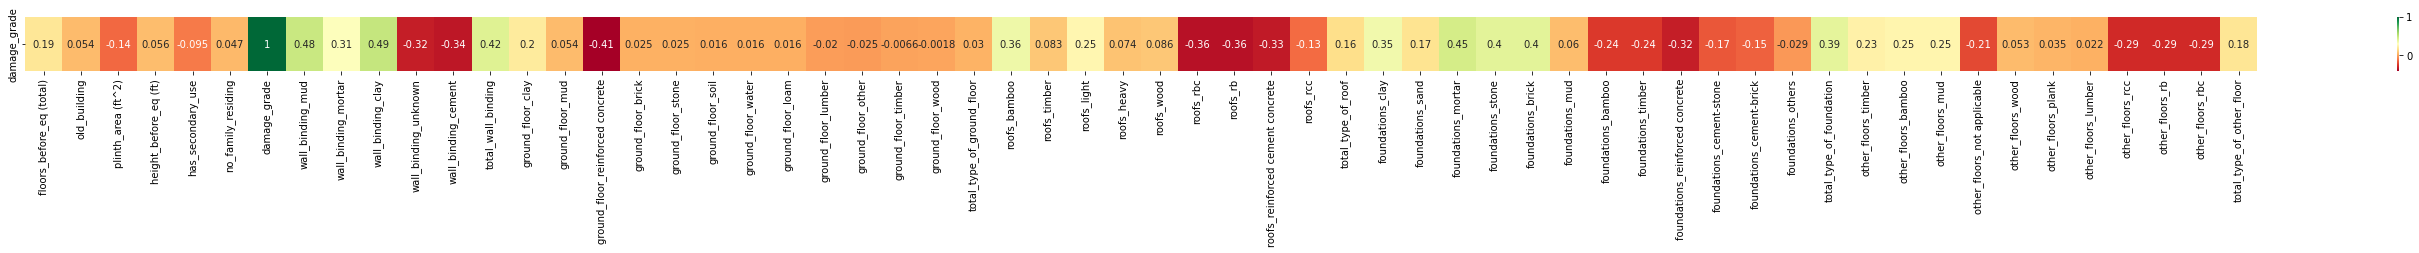

In [50]:
damage_grade_corr = pd.DataFrame(train_cp.corr()["damage_grade"])

plt.figure(figsize=(50, 1))
sns.heatmap(damage_grade_corr.T, annot=True, cmap="RdYlGn")

## FE

In [51]:
cols = list(train_cp.columns)
a = cols.pop(cols.index("damage_grade"))
cols.append(a)

In [52]:
train_cp = train_cp[cols]
train_cp.head()

,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),land_surface_condition,position,building_plan_configuration,technical_solution_proposed,legal_ownership_status,has_secondary_use,...,other_floors_mud,other_floors_not applicable,other_floors_wood,other_floors_plank,other_floors_lumber,other_floors_rcc,other_floors_rb,other_floors_rbc,total_type_of_other_floor,damage_grade
0,2,1.0,17.0688,22.0,Flat,Not attached,Rectangular,No need,Private,0.0,...,1,0,0,0,0,0,0,0,3,1.0
1,3,3.0,300.2280,18.0,Flat,Not attached,Square,Reconstruction,Private,0.0,...,1,0,0,0,0,0,0,0,3,5.0
3,2,18.0,56.3880,15.0,Flat,Not attached,Rectangular,Reconstruction,Private,0.0,...,1,0,0,0,0,0,0,0,3,4.0
4,2,22.0,27.4320,17.0,Flat,Not attached,Rectangular,No need,Private,0.0,...,1,0,0,0,0,0,0,0,3,1.0
7,2,40.0,153.6192,14.0,Flat,Not attached,Rectangular,Reconstruction,Private,0.0,...,1,0,0,0,0,0,0,0,3,4.0


In [53]:
from sklearn.model_selection import train_test_split

objectCol = list(train_cp.select_dtypes(include=['object']).columns)
numCol = list(train_cp.select_dtypes(exclude=['object']).columns)[:-1]

X = train_cp.iloc[:, :-1]
y = train_cp.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [54]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
numeric_features = numCol
categorical_features = objectCol
numeric_transformer = make_pipeline(StandardScaler())
categorical_transformer = make_pipeline(OneHotEncoder())
Preprocessor = ColumnTransformer(
    transformers=[
        ('numeric_transformer', numeric_transformer, numeric_features),
        ('categorical_transformer', categorical_transformer, categorical_features)
    ])

In [55]:
from imblearn.under_sampling import RandomUnderSampler 

X_train = Preprocessor.fit_transform(X_train)
X_test = Preprocessor.transform(X_test)
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

In [56]:
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score

l = LGBMClassifier(random_state=42)
l.fit(X_rus, y_rus)

y_pred = l.predict(X_test)

print(f1_score(y_test, y_pred, average='macro'))

0.8150769112940981


In [69]:
from catboost import CatBoostClassifier

c = CatBoostClassifier(random_state=42)
c.fit(X_rus, y_rus)

y_pred = c.predict(X_test)

print(f1_score(y_test, y_pred, average='macro'))

Learning rate set to 0.101229
0:	learn: 1.3443438	total: 192ms	remaining: 3m 12s
1:	learn: 1.1732624	total: 220ms	remaining: 1m 49s
2:	learn: 1.0476671	total: 271ms	remaining: 1m 30s
3:	learn: 0.9501518	total: 302ms	remaining: 1m 15s
4:	learn: 0.8714129	total: 326ms	remaining: 1m 4s
5:	learn: 0.8068794	total: 366ms	remaining: 1m
6:	learn: 0.7523410	total: 437ms	remaining: 1m 1s
7:	learn: 0.7069477	total: 470ms	remaining: 58.3s
8:	learn: 0.6680238	total: 510ms	remaining: 56.2s
9:	learn: 0.6346966	total: 550ms	remaining: 54.4s
10:	learn: 0.6055650	total: 584ms	remaining: 52.5s
11:	learn: 0.5803965	total: 615ms	remaining: 50.6s
12:	learn: 0.5583165	total: 650ms	remaining: 49.4s
13:	learn: 0.5390436	total: 700ms	remaining: 49.3s
14:	learn: 0.5222358	total: 726ms	remaining: 47.7s
15:	learn: 0.5075256	total: 751ms	remaining: 46.2s
16:	learn: 0.4944757	total: 777ms	remaining: 44.9s
17:	learn: 0.4829851	total: 805ms	remaining: 43.9s
18:	learn: 0.4727143	total: 838ms	remaining: 43.3s
19:	learn:

In [26]:
import optuna

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score

def l_objective(trial):
    params = {
        "objective": "multiclass",
        "metric": "multi_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "num_class": 5,
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }

    l = LGBMClassifier(**params, random_state=42)
    l.fit(X_rus, y_rus)

    y_pred = l.predict(X_test)
    return f1_score(y_test, y_pred, average='macro')

x_study = optuna.create_study(direction='maximize')
x_study.optimize(l_objective, n_trials=100, n_jobs=6, timeout=600)

In [58]:
x_study.best_params

{'lambda_l1': 7.715270163534368e-07,
 'lambda_l2': 1.0907341239984183,
 'num_leaves': 69,
 'feature_fraction': 0.6013964219112191,
 'bagging_fraction': 0.9617169178038356,
 'bagging_freq': 5,
 'min_child_samples': 35}

{'lambda_l1': 3.149763827998476e-05,
 'lambda_l2': 0.0022803996097699795,
 'num_leaves': 103,
 'feature_fraction': 0.5255622071474219,
 'bagging_fraction': 0.9968684902253966,
 'bagging_freq': 1,
 'min_child_samples': 67} -> 0.817

\\

{'lambda_l1': 4.04505578220734e-08,
 'lambda_l2': 0.7377999667810557,
 'num_leaves': 77,
 'feature_fraction': 0.506286507386845,
 'bagging_fraction': 0.9414545650424067,
 'bagging_freq': 2,
 'min_child_samples': 100} -> 0.817445591057586

\\
 
 {'lambda_l1': 7.715270163534368e-07,
 'lambda_l2': 1.0907341239984183,
 'num_leaves': 69,
 'feature_fraction': 0.6013964219112191,
 'bagging_fraction': 0.9617169178038356,
 'bagging_freq': 5,
 'min_child_samples': 35} -> 0.817720414485738

In [59]:
params = {'lambda_l1': 7.715270163534368e-07,
          'lambda_l2': 1.0907341239984183,
          'num_leaves': 69,
          'feature_fraction': 0.6013964219112191,
          'bagging_fraction': 0.9617169178038356,
          'bagging_freq': 5,
          'min_child_samples': 35}

l_model = LGBMClassifier(**params, random_state=42)
l_model.fit(X_rus, y_rus)

y_pred = l_model.predict(X_test)
print(f1_score(y_test, y_pred, average='macro'))


[LightGBM] [Warning] feature_fraction is set=0.6013964219112191, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6013964219112191
[LightGBM] [Warning] lambda_l1 is set=7.715270163534368e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.715270163534368e-07
[LightGBM] [Warning] bagging_fraction is set=0.9617169178038356, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9617169178038356
[LightGBM] [Warning] lambda_l2 is set=1.0907341239984183, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0907341239984183
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
0.817720414485738


In [60]:
from collections import Counter
hasil = l_model.predict(Preprocessor.transform(test_cp))

Counter(hasil).most_common()

[(5.0, 79856), (4.0, 69489), (3.0, 41205), (2.0, 35104), (1.0, 16428)]

In [76]:
submit_df = Preprocessor.transform(test_cp)
y_pred_sub = c.predict(submit_df)

y_pred_sub

array([[4.],
       [5.],
       [5.],
       ...,
       [1.],
       [4.],
       [4.]])

In [73]:
submission = pd.read_csv("../../dataset/raw/sample_submission.csv")
submission["damage_grade"] = y_pred_sub
submission["damage_grade"] = submission["damage_grade"].astype(int)
submission.head()

,id,damage_grade
0,0,4
1,1,5
2,2,5
3,3,4
4,4,2


In [74]:
submission.head(100)

,id,damage_grade
0,0,4
1,1,5
2,2,5
3,3,4
4,4,2
...,...,...
95,95,5
96,96,3
97,97,5
98,98,2


In [79]:
submission["damage_grade"].value_counts()

5    80656
4    68688
3    41209
2    35125
1    16404
Name: damage_grade, dtype: int64

In [33]:
submission.to_csv("../../dataset/submission_catboost_fe_terbaru.csv", index=False)